# Import Libraries

In [1]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Load and Pre-Process data

In [2]:
labels = ['NORMAL','PNEUMONIA']

In [3]:
print("pre-processing data\n")
image_data = []
label_data = []
image_size = 150
data_dirs = ["train","val", "test"]  # List of directories to load data from
for data_dir in data_dirs:
    for i in labels:
        data_path = os.path.join("/kaggle/input/chest-xray-pneumonia/chest_xray/", data_dir, i)
        for m in tqdm(os.listdir(data_path)):
            image = cv2.imread(os.path.join(data_path, m))
            image = cv2.resize(image, (image_size, image_size))
            image_data.append(image)
            label_data.append(i)
image_data = np.array(image_data)
label_data = np.array(label_data)

pre-processing data



100%|██████████| 390/390 [00:04<00:00, 93.28it/s]


In [4]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [5]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

# VGG16 Model

In [9]:
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │          16,386 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,731,074 (56.19 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)

In [11]:
history=modelvgg.fit(X_train,Y_train,
 epochs=10,batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - auc: 0.9094 - loss: 1.9350 - val_auc: 0.9274 - val_loss: 2.6810
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - auc: 0.9727 - loss: 0.6480 - val_auc: 0.9442 - val_loss: 1.7165
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - auc: 0.9744 - loss: 0.5879 - val_auc: 0.9550 - val_loss: 1.3216
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - auc: 0.9871 - loss: 0.2513 - val_auc: 0.9531 - val_loss: 1.8119
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - auc: 0.9854 - loss: 0.3897 - val_auc: 0.9486 - val_loss: 1.8367
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - auc: 0.9903 - loss: 0.2480 - val_auc: 0.9567 - val_loss: 1.9376
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - auc: 0.9877 - loss: 0.2992 - val_auc: 0.9483 - val_loss: 2.8954
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - auc: 0.9887 - loss: 0.2519 - val_auc: 0.9604 - val_loss: 1.9565
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 

# Accuracy & Loss

In [12]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - auc: 0.9915 - loss: 0.1900
Train Loss:  0.19788676500320435
Train Accuracy:  0.9904766082763672


In [13]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 305ms/step - auc: 0.9564 - loss: 1.3604
Test Loss:  1.3215916156768799
Test Accuracy:  0.9550497531890869


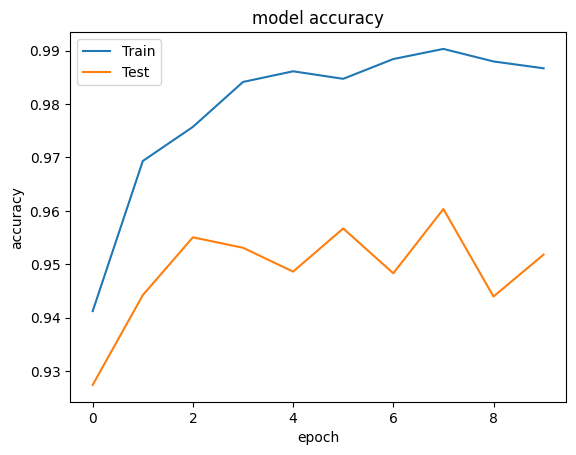

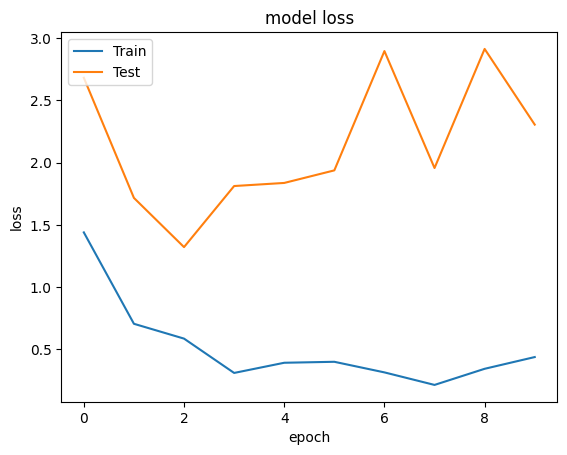

In [14]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix & Classification Report

In [15]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step
[[307  22]
 [ 39 804]]


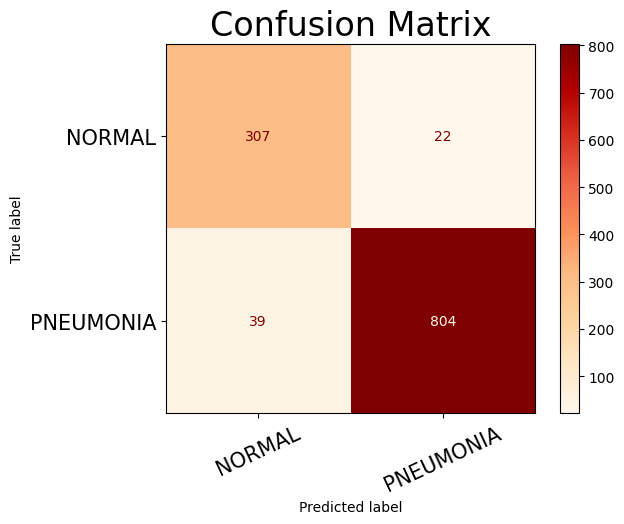

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       329
           1       0.97      0.95      0.96       843

    accuracy                           0.95      1172
   macro avg       0.93      0.94      0.94      1172
weighted avg       0.95      0.95      0.95      1172



In [16]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))